In [5]:
#인덱스 기준:sort_index
#데이터 기준:sort_values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
obj=pd.Series(range(4), index=['j','i','k','p'])
obj.sort_index()

i    1
j    0
k    2
p    3
dtype: int64

In [7]:
df=pd.DataFrame(np.arange(8).reshape((2,4)),
            index=['three', 'one'],
            columns=['k','j','i','p'])
df.sort_index() #행을 기준으로 정렬, axis=0, default
df.sort_index(axis=1) #열을 기준으로 정렬
df.sort_index(axis=1,ascending=False) #열을 기준으로 정렬

,p,k,j,i
three,3,0,1,2
one,7,4,5,6


In [8]:
obj=pd.Series([2,np.nan,5,-3,0])
obj

0    2.0
1    NaN
2    5.0
3   -3.0
4    0.0
dtype: float64

In [9]:
obj.sort_values()

3   -3.0
4    0.0
0    2.0
2    5.0
1    NaN
dtype: float64

In [10]:
df=pd.DataFrame({'z':[3,2,-1,5], 'a':[0,1,0,1]})
df

,z,a
0,3,0
1,2,1
2,-1,0
3,5,1


In [11]:
df.sort_values(by=['a','z'])

,z,a
2,-1,0
0,3,0
1,2,1
3,5,1


In [12]:
obj=pd.Series(range(5),index=['a','a','b','c','c'])
obj

a    0
a    1
b    2
c    3
c    4
dtype: int64

In [13]:
obj.index.is_unique

False

In [14]:
type(obj['a'])

pandas.core.series.Series

In [15]:
df=pd.DataFrame(np.random.randn(4,3), index=['a','a','b','b'])
df
#df에 저장된 'b'인덱스 행을 모두 추출하시오
df.loc['b']
#df.ix['b'] 옛날 버전에서는 수행됨, df.loc[라벨명] or df.iloc[index]
#df.ix[3]

,0,1,2
b,0.065189,-0.790649,1.218722
b,-1.967461,-0.207487,-1.770639


In [16]:
df=pd.DataFrame([[1.3, np.nan],
             [7.5, -5.5],
             [np.nan, np.nan],
             [0.5, -1.5]],
               index=['a','b','c','d'],
               columns=['one','two'])
#데이터프레임:딕셔너리, 리스트, ...
df

df.sum(axis='rows') #컬럼의 합, nan제외, 결과가 시리즈, default : axis=0, 'rows'
df.sum(axis='columns') 
#nan은 0으로 취급(na는 skip)

a    1.3
b    2.0
c    0.0
d   -1.0
dtype: float64

In [17]:
print(df)
df.mean() #axis=0 디폴트
df.mean(axis=1)
df.mean(axis=1, skipna=False) #기본값은 True

   one  two
a  1.3  NaN
b  7.5 -5.5
c  NaN  NaN
d  0.5 -1.5


a    NaN
b    1.0
c    NaN
d   -0.5
dtype: float64

In [18]:
df
df.idxmax()

one    b
two    d
dtype: object

In [19]:
df
df.cumsum()

,one,two
a,1.3,NaN
b,8.8,-5.5
c,NaN,NaN
d,9.3,-7.0


In [20]:
print(df)
df.describe()

   one  two
a  1.3  NaN
b  7.5 -5.5
c  NaN  NaN
d  0.5 -1.5


,one,two
count,3.000000,2.000000
mean,3.100000,-3.500000
std,3.831449,2.828427
min,0.500000,-5.500000
25%,0.900000,-4.500000
50%,1.300000,-3.500000
75%,4.400000,-2.500000
max,7.500000,-1.500000


In [21]:
#pd.Series(['a','a','b','b','c'])
obj=pd.Series(['a','a','b','b','c']*3)
obj.describe()

count     15
unique     3
top        a
freq       6
dtype: object

In [22]:
#Collaborative Filtering(협업필터링) -> 추천시스템
#협업필터링 알고리즘을 기반으로 추천시스템 제작
#두 사람간 유사도 -> 예상 평점
#User-based 협업필터링 :사용자 기반 협업필터링
#Item-based 협업필터링 :아이템 기반 협업필터링
#hybrid-based 협업필터링 :하이브리드 기반 협업필터링


In [23]:
critics={
            'BTS':{'암수살인':5,'바울':4, '할로윈':1.5},
                      '손흥민':{'바울':5, '할로윈':2},
    '레드벨벳':{'암수살인':2.5, '바울':2, '할로윈':1},
    '트와이스':{'암수살인':3.5, '바울':4, '할로윈':5}}

In [24]:
for c in critics:
    print(c)

BTS
손흥민
레드벨벳
트와이스


In [25]:
critics['손흥민']
critics.get('손흥민')

{'바울': 5, '할로윈': 2}

In [26]:
critics.get('손흥민')['할로윈']

2

In [27]:
critics.get('손흥민').get('할로윈')

2

In [28]:
from math import sqrt
pow(2,3) #2의 3승
pow(2,2) #2의 제곱

#sqrt(pow((x1-x2),2)+pow((y1-y2),2))

#sqrt(pow(1,2)+pow(2,2))

def sim(i,j): #i:x2-x1, j:y2-y1
    return sqrt(pow(i,2)+pow(j,2))

In [29]:
#sim함수를 이용하여 '손흥민'과 '트와이스' 사이의 거리를 구하시오.
var1=critics.get('손흥민').get('바울')-critics.get('트와이스').get('바울')
var2=critics.get('손흥민').get('할로윈')-critics.get('트와이스').get('할로윈')
print(sim(var1,var2))

3.1622776601683795


In [30]:
# 손흥민 VS 레드벨벳 : ???
# 손흥민 VS BTS : ???
# 손흥민 VS 트와이스 : 3.16

for c in critics:
    if c!='손흥민':
        num1=critics.get('손흥민').get('바울')-critics.get(c).get('바울')
        num2=critics.get('손흥민').get('할로윈')-critics.get(c).get('할로윈')
        print(c, ":", sim(num1,num2))

BTS : 1.118033988749895
레드벨벳 : 3.1622776601683795
트와이스 : 3.1622776601683795


In [31]:
#정규화: 각 열을 기준으로, 각 열 데이터의 값을 0~1사이로 오도록 하는 작업
#정규화 =(각열 데이터-각열 최소값) / (각열 최대값 - 각열 최소값)
for c in critics:
    if c!='손흥민':
        num1=critics.get('손흥민').get('바울')-critics.get(c).get('바울')
        num2=critics.get('손흥민').get('할로윈')-critics.get(c).get('할로윈')
        print(c, ":", 1/(sim(num1,num2)+1)   )
#sim함수 값(두 점 사이의 거리)이 클수록 -> 0에 근사해짐
#sim함수 값(두 점 사이의 거리)이 작을수록 -> 1에 근사해짐

#0에 가까울수록 두 사람의 영화 취향이 매우 다름.
#무한대에 가까울수록 두 사람의 영화 취향이 매우 비슷.


#1.정규화 =(각열 데이터-각열 최소값) / (각열 최대값 - 각열 최소값)
#바울, 할로윈 열에 대해 정규화 작업 수행
#             (    4    -   2) / (5 - 2)  =0.667
# critics={
#     'BTS':{'암수살인':5, '바울':4  -> 0.667, '할로윈':1.5},
#     '손흥민':{'바울':5, '할로윈':2},
#     '레드벨벳':{'암수살인':2.5, '바울':2, '할로윈':1},
#     '트와이스':{'암수살인':3.5, '바울':4, '할로윈':5}}

BTS : 0.4721359549995794
레드벨벳 : 0.2402530733520421
트와이스 : 0.2402530733520421


In [32]:
critics = {

    '레드벨벳': {

        '택시운전사': 2.5,

        '겨울왕국': 3.5,

        '리빙라스베가스': 3.0,

        '넘버3': 3.5,

        '사랑과전쟁': 2.5,

        '세계대전': 3.0,

    },

    'BTS': {

        '택시운전사': 1.0,

        '겨울왕국': 4.5,

        '리빙라스베가스': 0.5,

        '넘버3': 1.5,

        '사랑과전쟁': 4.5,

        '세계대전': 5.0,

    },

    '블랙핑크': {

        '택시운전사': 3.0,

        '겨울왕국': 3.5,

        '리빙라스베가스': 1.5,

        '넘버3': 5.0,

        '세계대전': 3.0,

        '사랑과전쟁': 3.5,

    },

    '소녀시대': {

        '택시운전사': 2.5,

        '겨울왕국': 3.0,
        
        #KNN(유유상종), 회귀모델, 신경망(딥러닝), RF => 결측값 대체
        
        '넘버3': 3.5,

        '세계대전': 4.0,

    },

    '마마무': {

        '겨울왕국': 3.5,

        '리빙라스베가스': 3.0,

        '세계대전': 4.5,

        '넘버3': 4.0,

        '사랑과전쟁': 2.5,

    },

    '오마이걸': {

        '택시운전사': 3.0,

        '겨울왕국': 4.0,

        '리빙라스베가스': 2.0,

        '넘버3': 3.0,

        '세계대전': 3.5,

        '사랑과전쟁': 2.0,

    },

    '모모랜드': {

        '택시운전사': 3.0,

        '겨울왕국': 4.0,

        '세계대전': 3.0,

        '넘버3': 5.0,

        '사랑과전쟁': 3.5,

    },

    '우주소녀': {'겨울왕국': 4.5, '사랑과전쟁': 1.0,

             '넘버3': 4.0},

}

In [33]:
#2. 소녀시대와 거리가 가장 가까운 그룹이 누구인지 조사하시오.
#(정규화를 먼저 진행하세요)

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import sqrt

In [35]:
#P, Q점 거리
def simDistance(data, name1, name2): #두 점 사이의 거리를 리턴해주는 함수
    #같은 영화를 본 데이터에 대해서만 수식으로 계산
    sum=0
    for i in data[name1]: #i에는 소녀시대가 관람한 영화 제목이 차례대로 저장됨
        if i in data[name2]:#'블랙핑크와 소녀시대가 같은 영화를 봤다면' -> 코딩
            sum+=pow(data[name1][i]-data[name2][i],2)
    #print(sqrt(sum)) #유클리디안거리
    return 1/(sqrt(sum)+1) #유사도
        
#     print(data[name1])
#     print(data[name2])
    
simDistance(critics, '소녀시대', '블랙핑크')    
#소녀시대와 블랙핑크 유클리디안 거리? 1.93
#소녀시대와 블랙핑크 유사도(0~1)? 0.34

0.3405424265831667

In [36]:
#소녀시대와 가장 유사도가 높은 관객(들) 셋을 검색 

In [37]:
def topMatch(data, name, index=3, simFunc=simDistance): #index는 유사도가 가장 높은 3명(그룹)
    res=[]
    for i in data: #i에는 critics의 키(관객명)가 차례대로 저장
        if i != name: #소녀시대를 제외한 나머지 그룹명에 해당한다면
            res.append((simFunc(data, name, i),i)) #simFunc 함수 호출
            #simFunc(critics, '소녀시대', '그룹명')
    print(res)
    
    #리스트 변수 초기화
    #소녀시대와 나머지 그룹간 유사도를 모두 구하고 저장(유사도,이름)한다(리스트)
    #유사도 정렬(내림) -> return (리스트에서 index 만큼 추출 )
    
topMatch(critics, '소녀시대')

[(0.4721359549995794, '레드벨벳'), (0.2449655295864104, 'BTS'), (0.3405424265831667, '블랙핑크'), (0.5358983848622454, '마마무'), (0.43050087404306037, '오마이걸'), (0.32037724101704074, '모모랜드'), (0.38742588672279304, '우주소녀')]


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

In [39]:
critics = {
    '레드벨벳': {
        '택시운전사': 2.5,
        '겨울왕국': 3.5,
        '리빙라스베가스': 3.0,
        '넘버3': 3.5,
        '사랑과전쟁': 2.5,
        '세계대전': 3.0,
    },
    'BTS': {
        '택시운전사': 1.0,
        '겨울왕국': 4.5,
        '리빙라스베가스': 0.5,
        '넘버3': 1.5,
        '사랑과전쟁': 4.5,
        '세계대전': 5.0,
    },
    '블랙핑크': {
        '택시운전사': 3.0,
        '겨울왕국': 3.5,
        '리빙라스베가스': 1.5,
        '넘버3': 5.0,
        '세계대전': 3.0,
        '사랑과전쟁': 3.5,
    },
    '소녀시대': {
        '택시운전사': 2.5,
        '겨울왕국': 3.0,
        '넘버3': 3.5,
        '세계대전': 4.0,
    },
    '마마무': {
        '겨울왕국': 3.5,
        '리빙라스베가스': 3.0,
        '세계대전': 4.5,
        '넘버3': 4.0,
        '사랑과전쟁': 2.5,
    },
    '오마이걸': {
        '택시운전사': 3.0,
        '겨울왕국': 4.0,
        '리빙라스베가스': 2.0,
        '넘버3': 3.0,
        '세계대전': 3.5,
        '사랑과전쟁': 2.0,
    },
    '모모랜드': {
        '택시운전사': 3.0,
        '겨울왕국': 4.0,
        '세계대전': 3.0,
        '넘버3': 5.0,
        '사랑과전쟁': 3.5,
    },
    '우주소녀': {
        '겨울왕국': 4.5, 
        '사랑과전쟁': 1.0,
        '넘버3': 4.0
    }
}

In [40]:
def simDistance(data, name1, name2):
    print(data[name1])
    print(data[name2])

simDistance(critics, "소녀시대", "블랙핑크")

{'택시운전사': 2.5, '겨울왕국': 3.0, '넘버3': 3.5, '세계대전': 4.0}
{'택시운전사': 3.0, '겨울왕국': 3.5, '리빙라스베가스': 1.5, '넘버3': 5.0, '세계대전': 3.0, '사랑과전쟁': 3.5}


(0.0, 5.0, 0.0, 5.0)

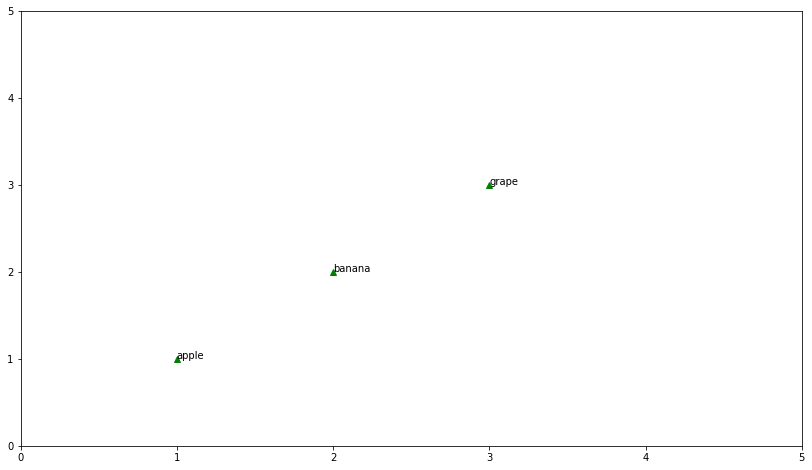

In [42]:
plt.figure(figsize=(14, 8))
plt.plot([1, 2, 3], [1, 2, 3], 'g^')
plt.text(1, 1, 'apple')
plt.text(2, 2, 'banana')
plt.text(3, 3, 'grape')
plt.axis([0, 5, 0, 5])

In [48]:
plt.rc('font', family='AppleGothic')

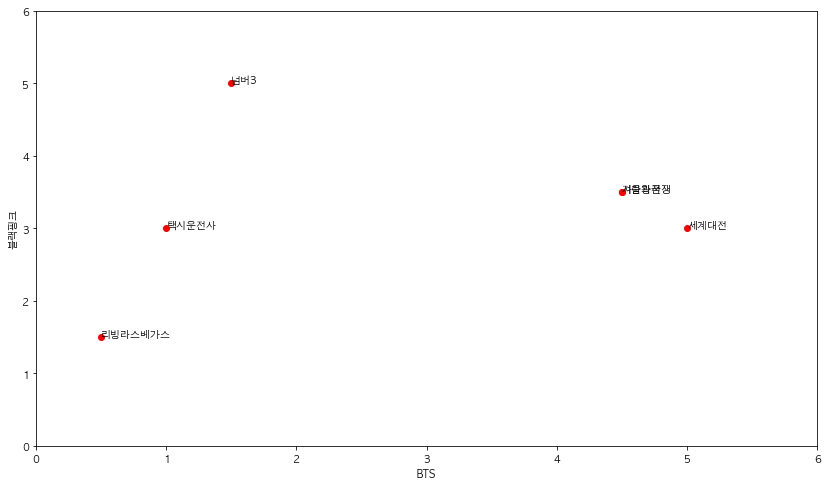

In [50]:
def drawGraph(critics, name1, name2):
    plt.figure(figsize=(14, 8))
 
    temp1 = []
    temp2 = []
    
    for i in critics[name1]:
        if i in critics[name2]:
            temp1.append(critics[name1][i])
            temp2.append(critics[name2][i])
            plt.text(critics[name1][i], critics[name2][i], i)
    plt.plot(temp1, temp2, 'ro')
    plt.axis([0, 6, 0, 6])
    plt.xlabel(name1)
    plt.ylabel(name2)
    
drawGraph(critics, "BTS", "블랙핑크")

In [51]:
topMatch(critics, 'BTS', 5)

[(0.1774053291584318, '레드벨벳'), (0.17176743283130236, '블랙핑크'), (0.2449655295864104, '소녀시대'), (0.1918253663634734, '마마무'), (0.19404996501286384, '오마이걸'), (0.1774053291584318, '모모랜드'), (0.1886378647726465, '우주소녀')]
